In [93]:
import numpy as np
import scipy.stats as sc
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
review_fields = ['review_id', 'user_id', 'business_id', 'stars', 'date'] #text
# user_id?
business_fields = ['business_id', 'name', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count']

business_df = pd.read_csv("yelp_business.csv", usecols=business_fields)
hours_chunks = pd.read_csv("yelp_business_hours.csv",chunksize=10000)
review_chunks = pd.read_csv("yelp_review.csv",usecols=review_fields,chunksize=10000)

print(business_df.info())
print("-------------")
for chunk in review_chunks:
    print(chunk.info())
    print("------------------")
    break
for chunk in hours_chunks:
    print(chunk.info())
    break

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174567 entries, 0 to 174566
Data columns (total 9 columns):
business_id     174567 non-null object
name            174567 non-null object
city            174566 non-null object
state           174566 non-null object
postal_code     173944 non-null object
latitude        174566 non-null float64
longitude       174566 non-null float64
stars           174567 non-null float64
review_count    174567 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 12.0+ MB
None
-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
review_id      10000 non-null object
user_id        10000 non-null object
business_id    10000 non-null object
stars          10000 non-null int64
date           10000 non-null object
dtypes: int64(1), object(4)
memory usage: 390.7+ KB
None
------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns 

# Data Cleaning
### Drop missing values
We're going to drop the missing values that we don't need

In [102]:
business_df = business_df.dropna()
#reviews = [chunk for chunks in review_chunks]

# Chunk Information
There are 18 Chunks of (approximate) size 10,000 for Business Hours

There are 526 chunks of (approximate) size 10,000 for Review Chunks (Before Cleaning)

In [97]:
count = 0
for i in review_chunks:
    count += 1
print("Chunks: ",count)

Chunks:  526


In [67]:
#plt.scatter(business_df['review_count'],business_df['stars'])

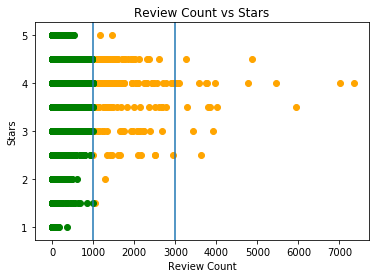

In [105]:
business_mod_1 = business_df[business_df.review_count > 1000]
business_mod_2 = business_df[business_df.review_count < 1000]
plt.scatter(business_mod_1['review_count'], business_mod_1['stars'],color="orange")
plt.scatter(business_mod_2['review_count'], business_mod_2['stars'],color="green")
plt.title("Review Count vs Stars")
plt.axvline(1000)
plt.axvline(3000)
plt.xlabel("Review Count")
plt.ylabel("Stars")
plt.show()

Interesting note -> The majority of businesses with more than 3,000 reviews Have a 2.5 rating or above

In [ ]:
business_mod = business_df[business_df.review_count > 1000]
